<a href="https://colab.research.google.com/github/NabeelDawood/ShaiAssessment/blob/main/ShaiAssessmentCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [730]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import Counter
# import regex as re

dataFile = "/content/drive/MyDrive/Projects/Shai/Assignment/Salaries.csv"
df = pd.DataFrame(pd.read_csv(dataFile))

In [731]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [732]:
print(f"No Of Rows = {df.shape[0]}")
print(f"No Of Columns = {df.shape[1]}")
df.info() # 2 Fields empty, 4 Field have some missing values, 7 Fields have no missing values

No Of Rows = 148654
No Of Columns = 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [733]:
df["Id"]= df["Id"].astype("object")

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [734]:
dataMean = df["TotalPayBenefits"].mean()
print(f"Mean = {dataMean}\n")
dataMedian = df["TotalPayBenefits"].median()
print(f"Median = {dataMedian}\n")
dataMode = df["TotalPayBenefits"].mode()[0]
print(f"Mode = {dataMode}\n")
dataMinimum = df["TotalPayBenefits"].min()
print(f"Minimum = {dataMinimum}\n")
dataMaximum = df["TotalPayBenefits"].max()
print(f"Maximum = {dataMaximum}\n")
dataStandardDeviation = df["TotalPayBenefits"].std()
print(f"Standard Deviation = {dataStandardDeviation}\n")
# determine the range of salaries (Task not clear)

Mean = 93692.55481056681

Median = 92404.09

Mode = 7959.18

Minimum = -618.13

Maximum = 567595.43

Standard Deviation = 62793.533483237705



In [735]:
df.describe(include= "all")

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
count,148654.0,148654,148654,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,148654,0.0
unique,148654.0,110811,2159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,1.0,Kevin Lee,Transit Operator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco,NaN
freq,1.0,13,7036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148654,NaN
mean,NaN,NaN,NaN,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN,NaN
std,NaN,NaN,NaN,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN,NaN
min,NaN,NaN,NaN,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN,NaN


3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

In [736]:
# Fields (Notes, Status) are totally empty and insignificant
try:
  df.pop("Notes")
  df.pop("Status")
except:
  pass
# df.head(1)

In [737]:
# Step to check presence of duplicate rows
mask = df.duplicated()
df[mask]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency


In [738]:
mask = df.isna().any(axis=1)
df[mask]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
110530,110531,David P Kucia,Police Officer 3,NaN,0.00,0.00,-33.89,0.00,-33.89,2013,San Francisco
148646,148647,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco


In [739]:
# Step to merge similar JobTitles by correcting spelling mistakes and reversing appreviations
df['JobTitle'] = df['JobTitle'].str.upper()
subDict = {
    " CC ": ["200"],
    " C ": ["100"],
    " L ": ["50"],
    " XXV ": ["25"],
    " X " : ["10"],
    " XI " : ["11"],
    " XII " : ["12"],
    " XIII " : ["13"],
    " XIV " : ["14"],
    " XV " : ["15"],
    " XVI " : ["16"],
    " XVII " : ["17"],
    " XVIII " : ["18"],
    " XIX " : ["19"],
    " XX " : ["20"],
    " XXI " : ["21"],
    " XXII " : ["22"],
    " I " : [r"\bI\b", "1"],
    " II " : ["2"],
    " III " : ["3"],
    " IV " : ["4"],
    " V " : ["5"],
    " VI " : ["6"],
    " VII " : ["7"],
    " VIII " : ["8"],
    " IX " : ["9"],
    "SUPERVISOR": ["SPRV", "SUPV", r"\bSUPERVI\b", "SUPERVISING", r"\bSUP\b", r"\bSUPERV\b"],
    "BUREAU OF CLAIMS" :["BUR CLM"],
    " AND ": ["&"],
    "SERVICES": [r"\bSVC\b", r"\bSVCS\b", r"\bSERV\b", r"\bSERVICE\b", r"\bSERVICESS\b"],
    "SPECIALIST": [r"\bSPEC\b"],
    "REPRESENTATIVE": [r"\bREPRES\b"],
    "PERFORMANCE": [r"\bPERF\b"],
    "MANAGER": ["MGR"],
    "ASSISTANT": ["ASST"],
    "ATTORNEY": ["ATTY", "ATTORNEYS", "ATTRY"],
    "OFFICE": ["OFC"],
    "ASSOCIATE": [r"\bASSOC\b"],
    "ARCHITECTURAL": [r"\bARCHITECT\b"],
    "MUSEUM": ["MUSM"],
    "ASIAN ART MUSEUM": ["AAM"],
    "CONSERVATOR": ["CNSRVT"],
    "SECURITY": [r"\bSEC\b"],
    "SENIOR": [r"\bSR\b"],
    "CHIEF": ["CHF"],
    "PRINCIPAL": [r"\bPR\b"],
    "DISTRICT ATTORNEY": ["DISTATTORNEY"],
    "INVESTIGATOR": ["INVSTGTOR"],
    "DISTRICT": [r"\bDIST\b"],
    "CRIMINAL": ["CRMNL"],
    "CIVIL": ["CVL"],
    "CITY": ["CTY"],
    "SENIOR CLAIMS INVESTIGATOR": ["SRCLAIMSINVESTIGATOR"],
    "MUNICIPAL TRANSPORTATION AGENC": ["MTA"],
    "CLERK": ["CLK"],
    "AGENCY": [r"\bAGENC\b"],
    "MEDICAL": [r"\bMED\b"],
    "MUNICIPAL": ["SFMUNICIPAL"],
    "DEVELOPMENT": ["DEVT", "DEVL", r"\bDEV\b"],
    "SPECIALIST": ["SPC"],
    "EMPLOYMENT": [r"\bEMP\b"],
    "HEALTH": ["HLTH"],
    "TECHNICIAN": [r"\bTECH\b"],
    "ENVIRONMENTAL": [r"\bENVIRONMENT\b", r"\bENVIRON\b"],
    "INSPECTOR": [r"\bINSP\b"],
    "PUBLIC SERVICES": [r"\bPS\b"],
    "DEPARTMENT": [r"\bDEPT\b"],
    "DISPATCHER": [r"\bDISP\b"],
    "COORDINATOR": [r"\bCOORD\b"],
    "SPECIALIST": [r"\bSPEC\b"],
    "DIVISION": [r"\bDIV\b"],
    "DIRECTOR": [r"\bDIR\b"],
    ".": [r"\bIS\b"],
    "EXECUTIVE": [r"\bEX\b"],
    "FACILITIES": [r"\bFACILITY\b", r"\bFAC\b"],
    "WORKER COMPENSATION": [r"\bWORKER COMP\b"],
    "COURT COMPUTER": ["CT COMP"],
    "APPLICATIONS": [r"\bAPP\b"],
    "WORKER": ["WRK", "WORKERR"],
    "SAFETY COMMUNICATIONS": [r"\bSAFETY COMM\b"],
    "MEMBER": ["MBR"],
    "BOARD COMMISSION": ["BRD COMM", "BOARD/COMMISSION", "BDCOMM", "BD/COMM"],
    "AIRPORT": ["AIRPORTS"],
    "PUBLIC": [r"\bPUB\b", r"\bPUBL\b"],
    "GROUP": ["GRP"],
    "COMMUNITY POLICE": ["COMM POL"],
    "PROFESSIONALS": [r"\bPROF\b"],
    "MAINTENANCE": [r"\bMAIN\b", r"\bMAINT\b"],
    "POWER HOUSE": ["POWERHOUSE"],
    "BUILDINGS": ["BLDG", "BLDGS", r"\bBUILDING\b"],
    "SUPERINTENDENT": ["SUPT"],
    "GROUNDSKEEPER": ["GROUNDSKPR"],
    "MUNICIPAL": [r"\bMUNI\b"],
    "COUNSELOR": ["CNSLR", "CNSELOR"],
    "AGENCY": [r"\bAG\b", r"\bAGE\b", r"\bAGENC\b"],
    "CHILD": ["CLD"],
    "FAMILY": [r"\bFAM\b"],
    "JUVENILE": [r"\bJUV\b"],
    "PROBATION": [r"\bPROB\b"],
    "ADULT": ["ADLT"],
    "ASSISTANT CHIEF PROBATION OFFICER": ["ACPO"],
    "COMPLAINTS": ["CMPLNTS"],
    "ASSESSOR-RECORDER": ["ASR"],
    "ELECTRONIC": [r"\bELECTR\b"],
    "QUALITY TECHNICIAN": ["QUALITYTECH"],
    "INSTRUMENTATION": ["INSTRMNTN"],
    "ENGINEER": [r"\bENG\b", "ENGR"],
    "APPRENTICE STATIONARY": ["APRNTC STATNRY", "APRNTCSTATNRY"],
    "SYSTEMS": [r"\bSYS\b"],
    "MECHANICAL SHOP": ["MECH SHOP"],
    "ELECTRICAL": ["ELECTRL"],
    "TRANSIT": ["TRNST"],
    "MECHANIC": [r"\bMECH\b"],
    "INSTRUCTOR": [r"\bINSTR\b"],
    "SEWAGE": [r"\bSEW\b"],
    "WATER TREATMENT PLANT": ["WTRTREATPLNT", "WATER TREATMENT PLN", "WTRTREAT PLNT", "WTR TREAT PLNT"],
    "VICTIM AND WITNESS": [r"\bVICTIM/WIT\b", "VICTIM/WITNESS"],
    "CONSTRUCTION": [r"\bCONST\b"],
    "HOSPITAL SENIOR": ["HSA SENIOR", "SEN HOSPITAL"],
    "STATIONARY": ["STATNRY"],
    "COMMISSION ON THE STATUS": ["COMM STATUS"],
    "AUTOMOTIVE B": ["AUTO B"],
    "AUTOMOTIVE M": ["AUTO M"],
    "AUTOMOTIVE S": ["AUTO S"],
    "DEPUTY": ["DEPTY"],
    "EMERGENCY": ["EMERGENCYCY"],
    "CLEANER": ["CLNR"],
    "ACTIVITIES": [r"\bACT\b"],
    "VOLUNTEER": [r"\bVOL\b"],
    "ACCESS SERVICES": [r"\bACCESSSERVICES\b"],
    "OPERATIONS": ["OPRS"],
    "MANAGEMENT": ["MGNT", "MGT"],
    "SECRETARY": ["SCTRY"],
    "HUMAN RIGHTS COMMISSION": [r"\bHUMAN RIGHTS COMM\b"],
    "REPRESENTATIVE": [r"\bREP\b"],
    "OFFICE OF CITIZEN COMPLAINT": [r"\bOCC\b"],
    "DISTRICT ATTORNEY INVESTIGATIVE ASSISTANT": ["DA INVESTIGATIVE ASSIST"],
    "DEPUTY DIRECTOR ": ["DEP DIRECTOR"],
    "CITY ATTORNEY OFFICE": [r"\bCA\b"],
    " , ": [","],
    " ": [r"\s+"],
    "INVESTMENT AND ADMINISTRATION": [r"\bINVEST AND ADMIN\b"],
    "ADMINISTRATOR": [r"\bADMIN\b"],
    "MEASURES": [r"\bMEAS\b"],
    "SAFETY COMMUNICATIONS": ["SAFETYCOMM", r"\bSAFETY COMMUNICATION\b", r"\bSAFETY COMM\b"],
    "EMERGENCY": [r"\bEMERG\b"],
    "ADMINISTRATIVE RESOLUTION": ["AD RESOLUTION"],
    "CONTROL": [r"\bCONT\b"],
    "CAPTAIN": [r"\bCAPT\b"],
    "PREVENTION": [r"\bPREV\b"],
    "PUBLIC SAFE": [r"\bPUBLIC SA\b", r"\bPUBLIC S\b"],
    "LIEUTENANT": [r"\bLIEUT\b"],
    "PROBATION OFFICE": ["PROBATION OFFICER"],
    "CHIEF DEPUTY": [r"\bCHIEF DEP\b", "DEP CHIEF"],
    "BATTALION": ["BATTLION"],
    "SOUTHEAST COMMUNITY FACILITIES": ["SE COM FACILITIES COMM"],
    "SECRETARY COMMISSION": [r"\bSECRETARY COMM\b"],
    "INSPECTION COMMISSION": [r"\bINSPECTION COMM\b"],
    "YOUTH COMMISSION": [r"\bYOUTH COMM\b"],
    "COMMUNICATIONS SYSTEMS": ["COMM SYSTEMS"],
    "BUSINESS ADMINISTRATION": [r"\bBUSINESS ADMINI\b"],
    "TREATMENT": [r"\bTREAT\b"],
    "VETERNIARY": [r"\bVET\b"],
    "TRAFFIC": ["TRAF"],
    "COMMUNICATIONS": [r"\bCOMMUNICATION\b"],
    "CENTRAL PROCESSING": ["CENT PROC"],
    "WATER TREATMENT PLANT": ["WTR PLTNCN", "WTR POLL"],
    "TRANSPORTATION": [r"\bTRNSP\b", r"\bTRANS\b"],
    "GENERAL": [r"\bGEN\b"],
    "TAX": [r"\bTAXI\b"],
    " ": [r"\s+"],
    }

In [740]:
for key in subDict.keys():
  for valu in subDict[key]:
    df['JobTitle'] = df['JobTitle'].str.replace(valu, key,regex= True)

df['JobTitle'] = df['JobTitle'].str.replace("'S", " ")
df['JobTitle'] = df['JobTitle'].str.replace("(", " ", regex= True)
df['JobTitle'] = df['JobTitle'].str.replace(")", " ", regex= True)
df['JobTitle'] = df['JobTitle'].str.replace("-", " ")
df['JobTitle'] = df['JobTitle'].str.replace(",", " ")
df['JobTitle'] = df['JobTitle'].str.replace(".", " ", regex= True)
df['JobTitle'] = df['JobTitle'].str.strip()
df['JobTitle'] = df['JobTitle'].str.replace(r"\s+", " ", regex= True)
# len(set(list(df['JobTitle'])))

In [741]:
# BasePay for JobTitles (containing No Pay) with BasePay value > 0 or Nan is replaced with 0 and modifying Benefits and TotalPay to match others in the same slice
mask = df['JobTitle'].str.contains("NO PAY")
df.loc[mask, 'BasePay'] = 0
df.loc[mask, 'Benefits'] = df[mask]['Benefits'].mode()[0]
df.loc[mask, 'TotalPay'] = df[mask]['TotalPay'].mode()[0]
# df[mask]

In [742]:
# BENEFITS for JobTitles (containing No BENEFITS) with BENEFITS value > 0 is replaced with 0 and modifying TotalPay & TotalPayBenefits accordingly
mask = df['JobTitle'].str.contains("NO BENEFITS") & df['Benefits'] > 0
df.loc[mask, 'Benefits'] = 0
df.loc[mask, 'TotalPay'] = df[mask]['BasePay']
df.loc[mask, 'TotalPayBenefits'] = df[mask]['BasePay']

# mask = df['JobTitle'].str.contains("NO BENEFIT")
# df[mask].describe()

In [743]:
df.describe(include= "all")

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
count,148654.0,148654,148654,148094.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,148654
unique,148654.0,110811,1295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,1.0,Kevin Lee,TRANSIT OPERATOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco
freq,1.0,13,9424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148654
mean,NaN,NaN,NaN,66303.494980,5066.059886,3648.767297,25007.842592,74768.313307,93692.463581,2012.522643,NaN
std,NaN,NaN,NaN,42774.585173,11454.380559,8056.601866,15402.314221,50517.017987,62793.660321,1.117538,NaN
min,NaN,NaN,NaN,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN
25%,NaN,NaN,NaN,33531.540000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN
50%,NaN,NaN,NaN,64994.460000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN
75%,NaN,NaN,NaN,94691.030000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN


In [744]:
# (BasePay, OvertimePay, OtherPay, Benefits) -ve values are only a few cases and should be just deleted
mask = (df['BasePay']< 0) | (df['OvertimePay']< 0) | (df['OtherPay']< 0) | (df['Benefits']< 0)
indexRows =  df[mask == True].index
df.drop(indexRows, axis= 0, inplace= True)

In [745]:
df.describe(include= "all")

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
count,148633.0,148633,148633,148076.000000,148629.000000,148629.000000,112470.000000,148633.000000,148633.000000,148633.000000,148633
unique,148633.0,110796,1295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,1.0,Kevin Lee,TRANSIT OPERATOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco
freq,1.0,13,9424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148633
mean,NaN,NaN,NaN,66309.469660,5066.750620,3649.257616,25011.475230,74776.749561,93702.789087,2012.522636,NaN
std,NaN,NaN,NaN,42772.278745,11455.040983,8057.002045,15400.656706,50514.371553,62790.187385,1.117589,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,NaN
25%,NaN,NaN,NaN,33544.802500,0.000000,0.000000,11546.870000,36178.330000,44097.080000,2012.000000,NaN
50%,NaN,NaN,NaN,64998.040000,0.000000,812.120000,28629.855000,71430.240000,92409.150000,2013.000000,NaN
75%,NaN,NaN,NaN,94691.040000,4658.830000,4237.140000,35568.720000,105846.070000,132881.790000,2014.000000,NaN


In [746]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148633 entries, 0 to 148652
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148633 non-null  object 
 1   EmployeeName      148633 non-null  object 
 2   JobTitle          148633 non-null  object 
 3   BasePay           148076 non-null  float64
 4   OvertimePay       148629 non-null  float64
 5   OtherPay          148629 non-null  float64
 6   Benefits          112470 non-null  float64
 7   TotalPay          148633 non-null  float64
 8   TotalPayBenefits  148633 non-null  float64
 9   Year              148633 non-null  int64  
 10  Agency            148633 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 13.6+ MB


In [747]:
print(df.groupby('JobTitle')['BasePay'].mean())

JobTitle
ACCOUNT CLERK                                    42593.966897
ACCOUNTANT                                       46643.172000
ACCOUNTANT I                                     61777.832500
ACCOUNTANT II                                    66880.084425
ACCOUNTANT III                                   78940.945000
                                                     ...     
WORKER COMPENSATION SUPERVISOR I                 90966.140000
X RAY LABORATORY AIDE                            46412.085794
YOUTH COMMISSION ADVISOR                         39077.957500
YOUTH COMMISSION ADVISOR BOARD OF SUPERVISORS    52609.910000
ZOO CURATOR                                      43148.000000
Name: BasePay, Length: 1295, dtype: float64


In [748]:
print(df.groupby('JobTitle')['OvertimePay'].mean())

JobTitle
ACCOUNT CLERK                                     234.586809
ACCOUNTANT                                          0.000000
ACCOUNTANT I                                        0.000000
ACCOUNTANT II                                       8.408673
ACCOUNTANT III                                      7.197374
                                                    ...     
WORKER COMPENSATION SUPERVISOR I                    0.000000
X RAY LABORATORY AIDE                            3501.813651
YOUTH COMMISSION ADVISOR                            0.000000
YOUTH COMMISSION ADVISOR BOARD OF SUPERVISORS       0.000000
ZOO CURATOR                                         0.000000
Name: OvertimePay, Length: 1295, dtype: float64


In [749]:
print(df.groupby('JobTitle')['OtherPay'].mean())

JobTitle
ACCOUNT CLERK                                      544.892593
ACCOUNTANT                                         786.096000
ACCOUNTANT I                                       258.268750
ACCOUNTANT II                                      466.709602
ACCOUNTANT III                                     620.849640
                                                     ...     
WORKER COMPENSATION SUPERVISOR I                    54.586000
X RAY LABORATORY AIDE                             1298.379603
YOUTH COMMISSION ADVISOR                          2336.350000
YOUTH COMMISSION ADVISOR BOARD OF SUPERVISORS     1022.960000
ZOO CURATOR                                      23538.560000
Name: OtherPay, Length: 1295, dtype: float64


In [750]:
print(df.groupby('JobTitle')['Benefits'].mean())

JobTitle
ACCOUNT CLERK                                    19911.574590
ACCOUNTANT                                                NaN
ACCOUNTANT I                                     26086.087500
ACCOUNTANT II                                    27730.821327
ACCOUNTANT III                                   28740.340612
                                                     ...     
WORKER COMPENSATION SUPERVISOR I                          NaN
X RAY LABORATORY AIDE                            18697.180500
YOUTH COMMISSION ADVISOR                         18704.242500
YOUTH COMMISSION ADVISOR BOARD OF SUPERVISORS             NaN
ZOO CURATOR                                               NaN
Name: Benefits, Length: 1295, dtype: float64


In [751]:
df.head(1)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco


In [752]:
# Replace Nan values for each JobTitle slice with the average of that group
basePayMean = df.groupby('JobTitle')['BasePay'].transform(np.mean)
overtimePayMean = df.groupby('JobTitle')['OvertimePay'].transform(np.mean)
otherPayMean = df.groupby('JobTitle')['OtherPay'].transform(np.mean)
benefitsMean = df.groupby('JobTitle')['Benefits'].transform(np.mean)
df['BasePay'].fillna(basePayMean, inplace= True)
df['OvertimePay'].fillna(overtimePayMean, inplace= True)
df['OtherPay'].fillna(otherPayMean, inplace= True)
df['Benefits'].fillna(benefitsMean, inplace= True)

In [753]:
# Records with JobTitle (Not Provided) are to be deleted
mask = df["JobTitle"] == "NOT PROVIDED"
rowIndex = df[mask].index
df.drop(rowIndex, axis= 0, inplace= True)

In [754]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148629 entries, 0 to 148649
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148629 non-null  object 
 1   EmployeeName      148629 non-null  object 
 2   JobTitle          148629 non-null  object 
 3   BasePay           148627 non-null  float64
 4   OvertimePay       148629 non-null  float64
 5   OtherPay          148629 non-null  float64
 6   Benefits          143694 non-null  float64
 7   TotalPay          148629 non-null  float64
 8   TotalPayBenefits  148629 non-null  float64
 9   Year              148629 non-null  int64  
 10  Agency            148629 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 13.6+ MB


In [755]:
print(df.groupby('JobTitle')['BasePay'].mean())

JobTitle
ACCOUNT CLERK                                    42593.966897
ACCOUNTANT                                       46643.172000
ACCOUNTANT I                                     61777.832500
ACCOUNTANT II                                    66880.084425
ACCOUNTANT III                                   78940.945000
                                                     ...     
WORKER COMPENSATION SUPERVISOR I                 90966.140000
X RAY LABORATORY AIDE                            46412.085794
YOUTH COMMISSION ADVISOR                         39077.957500
YOUTH COMMISSION ADVISOR BOARD OF SUPERVISORS    52609.910000
ZOO CURATOR                                      43148.000000
Name: BasePay, Length: 1294, dtype: float64


In [756]:
print(df.groupby('JobTitle')['OvertimePay'].mean())

JobTitle
ACCOUNT CLERK                                     234.586809
ACCOUNTANT                                          0.000000
ACCOUNTANT I                                        0.000000
ACCOUNTANT II                                       8.408673
ACCOUNTANT III                                      7.197374
                                                    ...     
WORKER COMPENSATION SUPERVISOR I                    0.000000
X RAY LABORATORY AIDE                            3501.813651
YOUTH COMMISSION ADVISOR                            0.000000
YOUTH COMMISSION ADVISOR BOARD OF SUPERVISORS       0.000000
ZOO CURATOR                                         0.000000
Name: OvertimePay, Length: 1294, dtype: float64


In [757]:
print(df.groupby('JobTitle')['OtherPay'].mean())

JobTitle
ACCOUNT CLERK                                      544.892593
ACCOUNTANT                                         786.096000
ACCOUNTANT I                                       258.268750
ACCOUNTANT II                                      466.709602
ACCOUNTANT III                                     620.849640
                                                     ...     
WORKER COMPENSATION SUPERVISOR I                    54.586000
X RAY LABORATORY AIDE                             1298.379603
YOUTH COMMISSION ADVISOR                          2336.350000
YOUTH COMMISSION ADVISOR BOARD OF SUPERVISORS     1022.960000
ZOO CURATOR                                      23538.560000
Name: OtherPay, Length: 1294, dtype: float64


In [758]:
print(df.groupby('JobTitle')['Benefits'].mean())

JobTitle
ACCOUNT CLERK                                    19911.574590
ACCOUNTANT                                                NaN
ACCOUNTANT I                                     26086.087500
ACCOUNTANT II                                    27730.821327
ACCOUNTANT III                                   28740.340612
                                                     ...     
WORKER COMPENSATION SUPERVISOR I                          NaN
X RAY LABORATORY AIDE                            18697.180500
YOUTH COMMISSION ADVISOR                         18704.242500
YOUTH COMMISSION ADVISOR BOARD OF SUPERVISORS             NaN
ZOO CURATOR                                               NaN
Name: Benefits, Length: 1294, dtype: float64


In [759]:
# The remaining 2 rows with Nan BasePay are better deleted as their JobTitle is unique for each
mask = df['BasePay'].isna()
indexRows =  df[mask == True].index
df.drop(indexRows, axis=0, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148627 entries, 0 to 148649
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148627 non-null  object 
 1   EmployeeName      148627 non-null  object 
 2   JobTitle          148627 non-null  object 
 3   BasePay           148627 non-null  float64
 4   OvertimePay       148627 non-null  float64
 5   OtherPay          148627 non-null  float64
 6   Benefits          143692 non-null  float64
 7   TotalPay          148627 non-null  float64
 8   TotalPayBenefits  148627 non-null  float64
 9   Year              148627 non-null  int64  
 10  Agency            148627 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 13.6+ MB


In [760]:
# The remaining rows with Nan Benefits will have Nan replaced with 0
df["Benefits"].fillna(0, inplace= True)

In [761]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148627 entries, 0 to 148649
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148627 non-null  object 
 1   EmployeeName      148627 non-null  object 
 2   JobTitle          148627 non-null  object 
 3   BasePay           148627 non-null  float64
 4   OvertimePay       148627 non-null  float64
 5   OtherPay          148627 non-null  float64
 6   Benefits          148627 non-null  float64
 7   TotalPay          148627 non-null  float64
 8   TotalPayBenefits  148627 non-null  float64
 9   Year              148627 non-null  int64  
 10  Agency            148627 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 13.6+ MB


In [762]:
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148627.000000,148627.000000,148627.000000,148627.000000,148627.000000,148627.000000,148627.000000
mean,66287.614431,5066.818801,3649.068994,24320.310354,74779.530534,93706.280544,2012.522590
std,42743.783907,11455.102977,8056.631535,15028.056976,50513.425550,62788.996555,1.117584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,33615.605000,0.000000,0.000000,11601.535000,36187.925000,44108.540000,2012.000000
50%,64960.800000,0.000000,812.120000,27559.930000,71431.750000,92412.080000,2013.000000
75%,94691.010000,4658.835000,4237.085000,34829.860784,105847.670000,132883.090000,2014.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [763]:
# The final step in to recalculate TotalPay & TotalPayBenefits according to corrected data
df['TotalPay'] = df['BasePay'] + df['OvertimePay'] + df["OtherPay"]
df["TotalPayBenefits"] = df["TotalPay"] + df["Benefits"]

In [764]:
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148627.000000,148627.000000,148627.000000,148627.000000,148627.000000,148627.000000,148627.000000
mean,66287.614431,5066.818801,3649.068994,24320.310354,75003.502225,99323.812579,2012.522590
std,42743.783907,11455.102977,8056.631535,15028.056976,50391.854337,62875.738602,1.117584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,33615.605000,0.000000,0.000000,11601.535000,36996.855000,52056.850000,2012.000000
50%,64960.800000,0.000000,812.120000,27559.930000,71554.450000,99106.247533,2013.000000
75%,94691.010000,4658.835000,4237.085000,34829.860784,105935.715000,139545.486029,2014.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

([<matplotlib.patches.Wedge at 0x7bdddd9b5a80>,
 [Text(0.729120544719838, 0.8236402316955181, "Sheriff's Office"),
  Text(-0.6193298271584533, 0.9090822653598961, 'District Attorney'),
  Text(-1.0856417722050373, 0.17714949179578734, 'Superior Court'),
  Text(-1.0161487353569778, -0.4212383501444459, 'Asian Art Museum'),
  Text(-0.7766760548379751, -0.7789571912764648, 'Airport'),
  Text(-0.4780704150313811, -0.9906809164770073, 'Police Dep'),
  Text(-0.16317522697864453, -1.0878298788415715, 'Juvenile Probation Dep'),
  Text(0.13982606616717427, -1.0910768401997235, 'Dep of Building Inspection'),
  Text(0.3982096293150522, -1.0253921645501145, 'Municipal Transportation Agency'),
  Text(0.5905237215829109, -0.9280526570447762, 'Child Support Services'),
  Text(0.7368915844493688, -0.8166950426981292, 'Customer Service Center'),
  Text(0.8527170136683747, -0.6948911386688487, 'Fire Dep'),
  Text(0.9440790681524424, -0.5645482380420793, 'Environmental Health'),
  Text(1.0038678481674799,

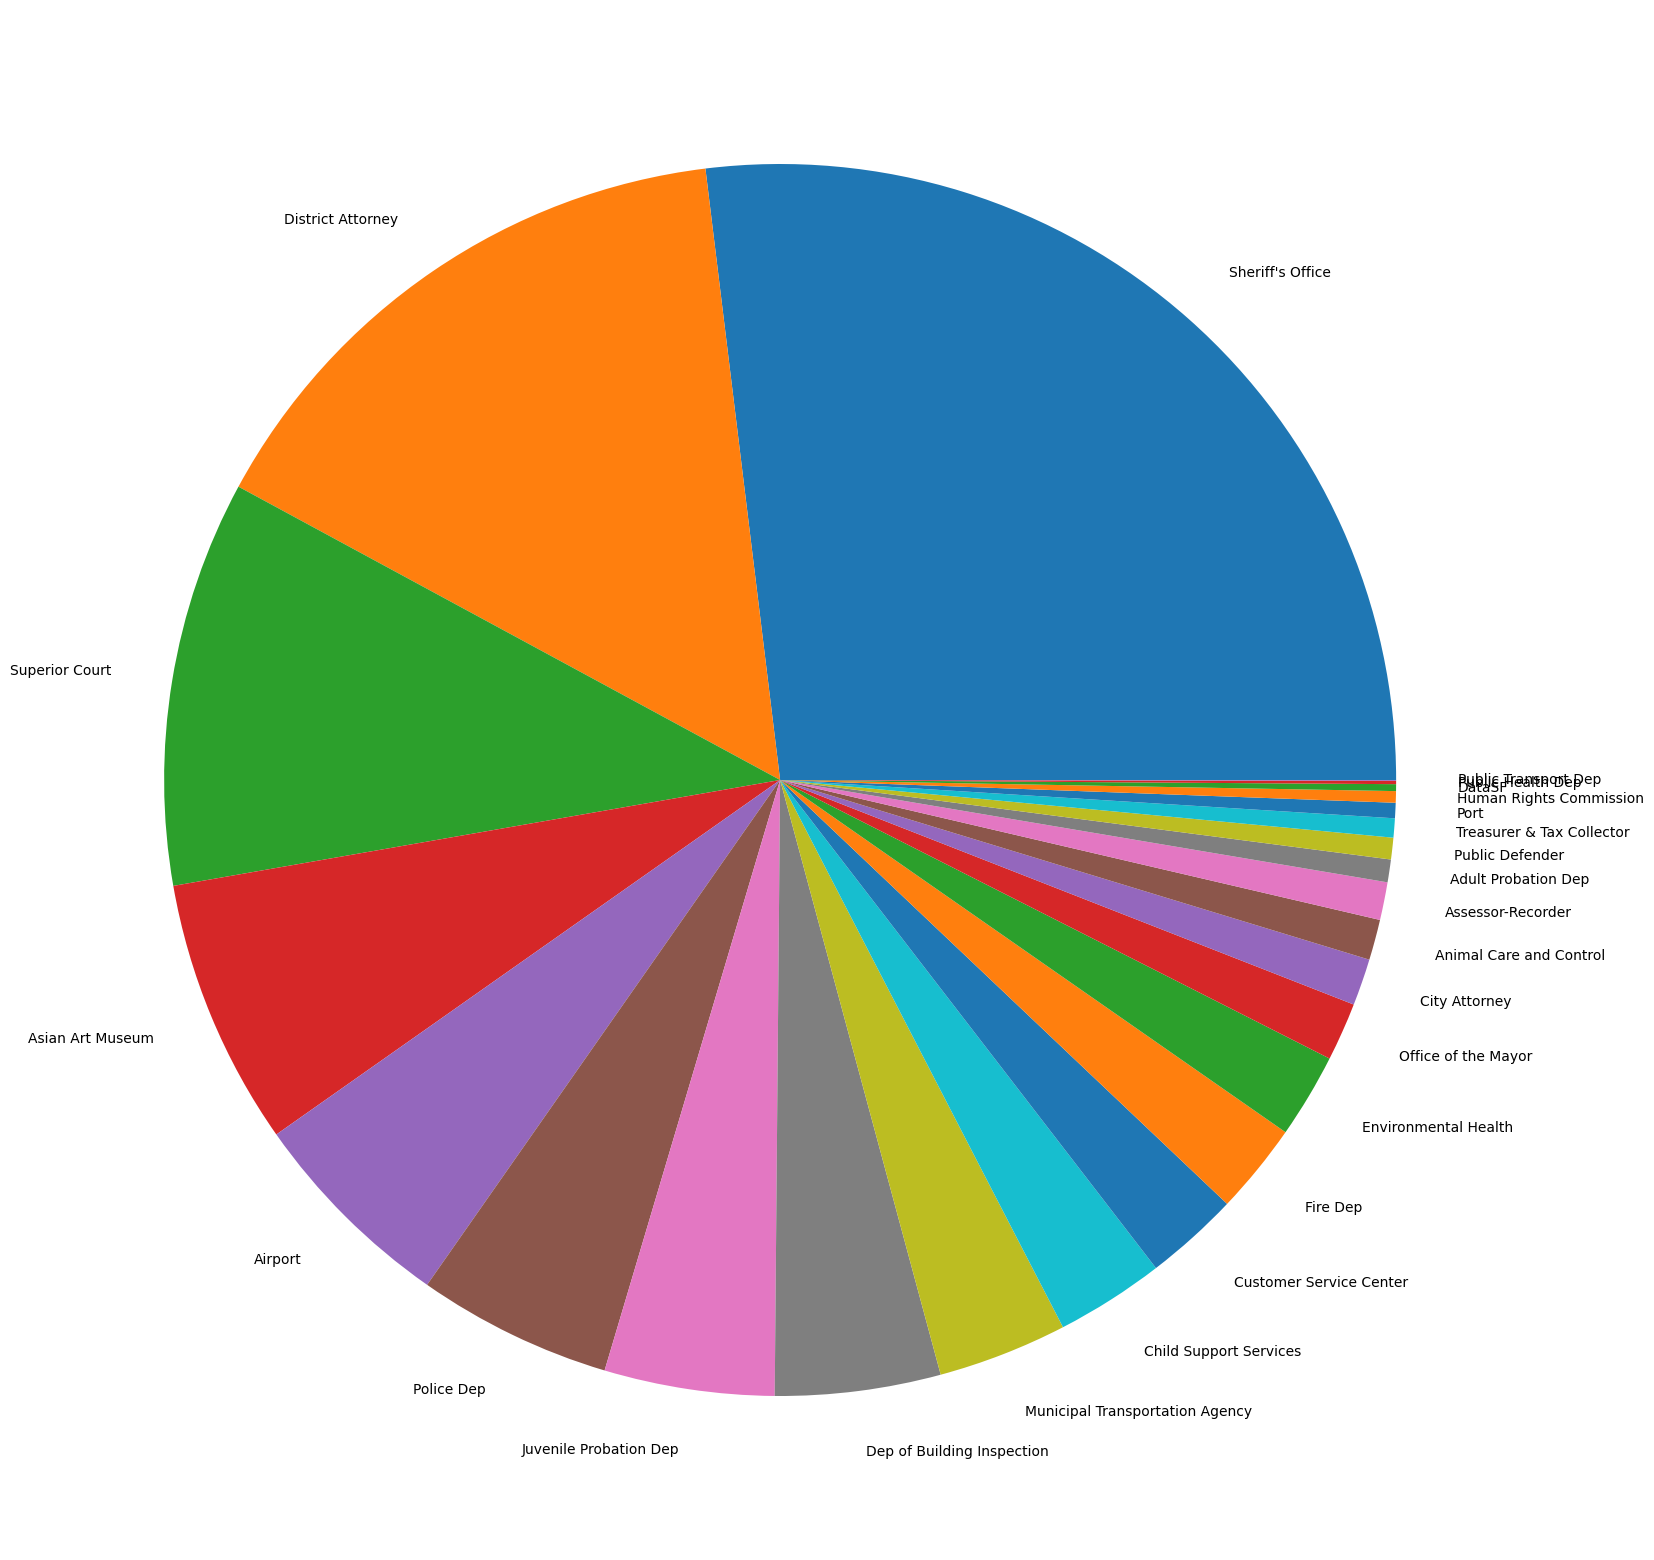

In [765]:
# use pie charts to represent the proportion of employees in different departments.
# I tried to pull out San Francisco and add a department field manually to different JobTitles in the database, but face many problems:
# 1- Some JobTitles are so broad and can fit in almost all departments
# 2- Some JobTitles have ambiguous clues to more than one department and depend on guessing to pick one of them
# 3- Some JobTitles have clear clues to more than one department and there's no value trying to pick on of them
# So I'll try to match it as close as possible

maskFire = df['JobTitle'].str.contains("DEPARTMENT") & df['JobTitle'].str.contains("FIRE")
maskPolice = df['JobTitle'].str.contains("DEPARTMENT") & df['JobTitle'].str.contains("POLICE")
maskPublicHealth = df['JobTitle'].str.contains("DEPARTMENT") & df['JobTitle'].str.contains("PUBLIC") & df['JobTitle'].str.contains("HEALTH")
maskPublicTransport = df['JobTitle'].str.contains("DEPARTMENT") & df['JobTitle'].str.contains("PUBLIC") & df['JobTitle'].str.contains("TRANSPORTATION")
maskServices = df['JobTitle'].str.contains("DEPARTMENT") & df['JobTitle'].str.contains("SERVICES")

maskCustomerServices = df['JobTitle'].str.contains("CUSTOMER") & df['JobTitle'].str.contains("SERVICES")
maskAirport = df['JobTitle'].str.contains("AIRPORT")
maskAnimalCare = df['JobTitle'].str.contains("ANIMAL")
maskAdultProbation = df['JobTitle'].str.contains("ADULT") & df['JobTitle'].str.contains("PROBATION")
maskAsianArtMuseum = df['JobTitle'].str.contains("MUSEUM")
maskAssessorRecorder = df['JobTitle'].str.contains("ASSESSOR")
maskDistrictAttorney = df['JobTitle'].str.contains("ATTORNEY")
maskEnvironmentalHealth = df['JobTitle'].str.contains("ENVIRONMENTAL") & df['JobTitle'].str.contains("HEALTH")
maskCityAttorney = df['JobTitle'].str.contains("CITY") & df['JobTitle'].str.contains("ATTORNEY")
maskHumanRights = df['JobTitle'].str.contains("HUMAN") & df['JobTitle'].str.contains("RIGHTS")
maskMunicipalTransport = df['JobTitle'].str.contains("MUNICIPAL") & df['JobTitle'].str.contains("TRANSPORTATION") & df['JobTitle'].str.contains("AGENCY")
maskMayor = df['JobTitle'].str.contains("MAYOR")
maskPort = df['JobTitle'].str.contains(" PORT")
maskPublicDefender = df['JobTitle'].str.contains("PUBLIC") & df['JobTitle'].str.contains("DEFENDER")
maskSuperiorCourt = df['JobTitle'].str.contains(r"\bCOURT\b")
maskTreasuresTax = df['JobTitle'].str.contains(r"\bTAX\b")
maskSheriff = df['JobTitle'].str.contains("SHERIFF")
maskBulidingInspection = df['JobTitle'].str.contains("BUILDING")
maskJuvenileProbation = df['JobTitle'].str.contains("JUVENILE")
maskChildSupport = df['JobTitle'].str.contains("FAMILY")

df.loc[maskFire, 'Department'] = "Fire Dep"
df.loc[maskPolice, 'Department'] = "Police Dep"
df.loc[maskPublicHealth, 'Department'] = "Public Health Dep"
df.loc[maskPublicTransport, 'Department'] = "Public Transport Dep"
df.loc[maskServices, 'Department'] = "DataSF"
df.loc[maskCustomerServices, 'Department'] = "Customer Service Center"
df.loc[maskAirport, 'Department'] = "Airport"
df.loc[maskAnimalCare, 'Department'] = "Animal Care and Control"
df.loc[maskAdultProbation, 'Department'] = "Adult Probation Dep"
df.loc[maskAsianArtMuseum, 'Department'] = "Asian Art Museum"
df.loc[maskAssessorRecorder, 'Department'] = "Assessor-Recorder"
df.loc[maskDistrictAttorney, 'Department'] = "District Attorney"
df.loc[maskEnvironmentalHealth, 'Department'] = "Environmental Health"
df.loc[maskCityAttorney, 'Department'] = "City Attorney"
df.loc[maskHumanRights, 'Department'] = "Human Rights Commission"
df.loc[maskMunicipalTransport, 'Department'] = "Municipal Transportation Agency"
df.loc[maskMayor, 'Department'] = "Office of the Mayor"
df.loc[maskPort, 'Department'] = "Port"
df.loc[maskPublicDefender, 'Department'] = "Public Defender"
df.loc[maskSuperiorCourt, 'Department'] = "Superior Court"
df.loc[maskTreasuresTax, 'Department'] = "Treasurer & Tax Collector"
df.loc[maskSheriff, 'Department'] = "Sheriff's Office"
df.loc[maskBulidingInspection, 'Department'] = "Dep of Building Inspection"
df.loc[maskJuvenileProbation, 'Department'] = "Juvenile Probation Dep"
df.loc[maskChildSupport, 'Department'] = "Child Support Services"



plt.figure(figsize= (20, 20))
plt.pie(df['Department'].value_counts(), labels= ["Sheriff's Office", "District Attorney", "Superior Court","Asian Art Museum", "Airport", "Police Dep", "Juvenile Probation Dep",
                                                  "Dep of Building Inspection", "Municipal Transportation Agency", "Child Support Services", "Customer Service Center", "Fire Dep",
                                                  "Environmental Health", "Office of the Mayor", "City Attorney", "Animal Care and Control", "Assessor-Recorder", "Adult Probation Dep",
                                                  "Public Defender", "Treasurer & Tax Collector", "Port", "Human Rights Commission", "DataSF", "Public Health Dep", "Public Transport Dep"])

# df['Department'].value_counts()

(array([1.0233e+04, 6.4330e+03, 4.4060e+03, 3.3440e+03, 2.9770e+03,
        2.6140e+03, 2.5970e+03, 2.2250e+03, 1.9860e+03, 2.1660e+03,
        2.4720e+03, 2.8980e+03, 3.7230e+03, 4.7040e+03, 6.0000e+03,
        6.5330e+03, 6.4200e+03, 5.8230e+03, 6.6120e+03, 5.8400e+03,
        5.2990e+03, 4.8470e+03, 4.6470e+03, 4.3310e+03, 3.8560e+03,
        3.3800e+03, 3.6410e+03, 2.9980e+03, 3.1140e+03, 3.0570e+03,
        2.5180e+03, 2.3300e+03, 2.0600e+03, 1.6260e+03, 1.5290e+03,
        1.2640e+03, 1.2390e+03, 9.7900e+02, 8.7200e+02, 8.3300e+02,
        8.0900e+02, 6.9000e+02, 4.7100e+02, 3.9300e+02, 3.6500e+02,
        2.7500e+02, 2.4900e+02, 1.9700e+02, 1.3400e+02, 1.0200e+02,
        8.1000e+01, 6.9000e+01, 5.8000e+01, 5.0000e+01, 3.0000e+01,
        3.3000e+01, 2.2000e+01, 2.9000e+01, 1.5000e+01, 1.5000e+01,
        1.5000e+01, 1.7000e+01, 8.0000e+00, 1.4000e+01, 1.5000e+01,
        1.1000e+01, 5.0000e+00, 3.0000e+00, 5.0000e+00, 5.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 3.00

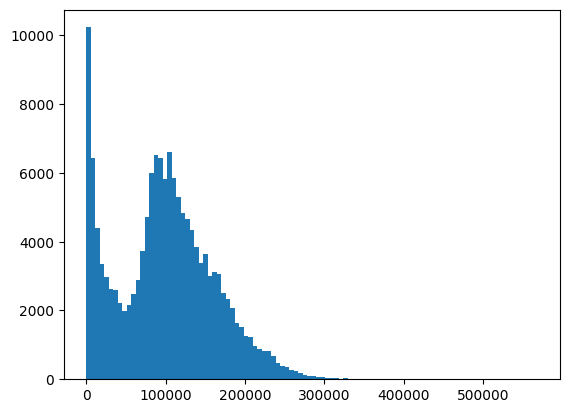

In [766]:
plt.hist(df["TotalPayBenefits"], bins= 100)

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [767]:
df.groupby("Year")['TotalPayBenefits'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2011,36159.0,93913.469921,54675.912853,34.59,56485.633636,92632.07011,130653.728504,567595.43
2012,36755.0,100583.029577,63541.927114,1.91,51843.310000,101768.58000,142408.305000,407274.78
2013,37596.0,102340.658820,65721.347189,15.99,53070.057657,102233.91000,142968.257500,425815.28
2014,38117.0,100266.402713,66232.546471,0.00,44266.790000,101110.28000,142749.740000,510732.68


In [791]:
df.groupby("Year")['BasePay'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2011,36159.0,63595.956517,40556.774993,0.0,33468.1250,62871.72,90649.7650,294580.02
2012,36755.0,65456.016752,41773.079877,0.0,34092.8650,64033.32,92433.6000,302578.00
2013,37596.0,69405.202236,44158.875884,0.0,37014.5625,67455.18,97806.8625,319275.01
2014,38117.0,66567.914561,44052.300868,0.0,30156.0900,65055.00,94738.1000,318835.49


In [792]:
df.groupby("Year")['OvertimePay'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2011,36159.0,4531.065429,10501.367793,0.0,0.0,0.0,4215.0400,245131.88
2012,36755.0,5024.881965,11433.282541,0.0,0.0,0.0,4692.5350,220909.48
2013,37596.0,5282.986146,12000.302693,0.0,0.0,0.0,4708.7875,196689.18
2014,38117.0,5402.277180,11769.899988,0.0,0.0,0.0,5114.2800,173547.73


In [793]:
df.groupby("Year")['OtherPay'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2011,36159.0,3617.081926,7959.889157,0.0,0.000,795.60,4057.7300,400184.25
2012,36755.0,3654.530981,7937.809148,0.0,9.845,922.75,4342.1200,245999.41
2013,37596.0,3820.194883,8535.489871,0.0,0.000,793.34,4448.6725,202322.37
2014,38117.0,3505.359263,7767.218152,0.0,0.000,695.89,4098.0300,342802.63


In [794]:
df.groupby("Year")['Benefits'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2011,36159.0,22169.366050,13582.397985,0.0,13338.421304,25712.356587,31440.328858,82548.62
2012,36755.0,26447.599879,15621.033766,0.0,13353.230000,30644.850000,37202.690000,84681.82
2013,37596.0,23832.275556,14747.903198,0.0,10936.210000,27157.550000,33900.802500,86533.21
2014,38117.0,24790.851709,15703.198680,0.0,10272.180000,28427.190000,35445.100000,96570.66


In [801]:
df['JobTitle'].value_counts()

TRANSIT OPERATOR                               9424
SPECIAL NURSE                                  5790
REGISTERED NURSE                               4955
CUSTODIAN                                      3214
POLICE OFFICER III                             3197
                                               ... 
POWER HOUSE ELECTRICIAN SUPERVISOR II             1
TRIAL DELAY REDUCTION COORDINATOR                 1
SENIOR EMPLOYEE ASSISTANCE COUNSELOR              1
COURT ADMINISTRATIVE RESOLUTION COORDINATOR       1
CONVERSION                                        1
Name: JobTitle, Length: 1292, dtype: int64

In [795]:
df.groupby(["JobTitle", "Year"])['TotalPayBenefits'].describe()

count          mean  \
JobTitle                                      Year                        
ACCOUNT CLERK                                 2011   83.0  19911.574590   
                                              2012   85.0  22946.211059   
                                              2013   90.0  19494.158778   
                                              2014   93.0  17541.932903   
ACCOUNTANT                                    2011    5.0      0.000000   
...                                                   ...           ...   
YOUTH COMMISSION ADVISOR                      2012    1.0  28229.660000   
                                              2013    2.0  15521.015000   
                                              2014    1.0  15545.280000   
YOUTH COMMISSION ADVISOR BOARD OF SUPERVISORS 2011    1.0      0.000000   
ZOO CURATOR                                   2011    1.0      0.000000   

                                                             std          min  \
JobTitle                                      Year                              
ACCOUNT CLERK                                 2011  3.660094e-12  19911.57459   
                                              2012  8.482150e+03    649.86000   
                                              2013  8.289514e+03     35.43000   
                                              2014  1.042088e+04      0.00000   
ACCOUNTANT                                    2011  0.000000e+00      0.00000   
...                                                          ...          ...   
YOUTH COMMISSION ADVISOR                      2012           NaN  28229.66000   
                                              2013  1.382604e+04   5744.53000   
                                              2014           NaN  15545.28000   
YOUTH COMMISSION ADVISOR BOARD OF SUPERVISORS 2011           NaN      0.00000   
ZOO CURATOR                                   2011           NaN      0.00000   

                                                            25%          50%  \
JobTitle                                      Year                             
ACCOUNT CLERK                                 2011  19911.57459  19911.57459   
                                              2012  24741.04000  27015.49000   
                                              2013  15763.55500  24858.07000   
                                              2014   6122.60000  24500.44000   
ACCOUNTANT                                    2011      0.00000      0.00000   
...                                                         ...          ...   
YOUTH COMMISSION ADVISOR                      2012  28229.66000  28229.66000   
                                              2013  10632.77250  15521.01500   
                                              2014  15545.28000  15545.28000   
YOUTH COMMISSION ADVISOR BOARD OF SUPERVISORS 2011      0.00000      0.00000   
ZOO CURATOR                                   2011      0.00000      0.00000   

                                                            75%          max  
JobTitle                                      Year                            
ACCOUNT CLERK                                 2011  19911.57459  19911.57459  
                                              2012  27459.76000  28271.71000  
                                              2013  24985.43000  26305.54000  
                                              2014  26280.42000  28155.02000  
ACCOUNTANT                                    2011      0.00000      0.00000  
...                                                         ...          ...  
YOUTH COMMISSION ADVISOR                      2012  28229.66000  28229.66000  
                                              2013  20409.25750  25297.50000  
                                              2014  15545.28000  15545.28000  
YOUTH COMMISSION ADVISOR BOARD OF SUPERVISORS 2011      0.00000      0.00000  
ZOO CURATOR                      

In [768]:
df.groupby("JobTitle").mean().round(decimals= 2).sort_values("BasePay", ascending= False)

<ipython-input-768-dbf8c7002235>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("JobTitle").mean().round(decimals= 2).sort_values("BasePay", ascending= False)


,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
JobTitle,,,,,,,
CHIEF FIRE DEPARTMENT,304232.34,0.00,21739.34,82893.64,325971.68,408865.33,2013.0
GENERAL MANAGER PUBLIC TRANSPORTATION DEPARTMENT,297769.41,0.00,0.00,82927.03,297769.41,380696.44,2013.0
CHIEF OF POLICE,296443.36,0.00,17442.52,82548.62,313885.88,396434.50,2012.5
CHIEF OF DEPARTMENT FIRE DEPARTMENT,285262.00,0.00,17115.73,0.00,302377.73,302377.73,2011.0
DEPUTY DIRECTOR FOR INVESTMENTS RET,276153.76,0.00,2438.78,77138.72,278592.54,355731.26,2012.5
...,...,...,...,...,...,...,...
ASSISTANT RECREATION SUPERVISOR,0.00,0.00,2474.41,0.00,2474.41,2474.41,2011.0
PUBLIC SAFETY COMMUNICATIONS TECHNICIAN,0.00,0.00,74.76,7959.18,74.76,8033.94,2012.0
RECREATION DIRECTOR,0.00,11.19,2891.30,4728.32,2902.49,7630.81,2012.4


In [769]:
df.groupby("JobTitle")['TotalPayBenefits'].describe()

,count,mean,std,min,25%,50%,75%,max
JobTitle,,,,,,,,
ACCOUNT CLERK,351.0,63285.020888,24088.234942,0.00,53203.027295,71095.52000,81396.1200,91262.07
ACCOUNTANT,5.0,47429.268000,27137.331315,1148.40,45304.380000,60076.24000,65225.3100,65392.01
ACCOUNTANT I,8.0,88122.188750,24641.399962,28110.76,93037.437500,98191.27000,99085.7400,100245.90
ACCOUNTANT II,226.0,95086.024027,19239.864690,1799.96,89996.662500,98858.10000,108452.5350,112654.81
ACCOUNTANT III,278.0,108309.332626,32280.256089,213.22,107731.740000,122634.03000,128734.3800,143869.55
...,...,...,...,...,...,...,...,...
WORKER COMPENSATION SUPERVISOR I,5.0,91020.726000,3839.052403,85277.39,89363.290000,92344.78000,92833.5400,95284.63
X RAY LABORATORY AIDE,126.0,69909.459548,33026.809074,1017.07,38821.327500,82750.21025,95249.4425,129044.16
YOUTH COMMISSION ADVISOR,4.0,60118.550000,27510.488387,24957.24,45247.702500,64871.28500,79742.1325,85774.39


In [770]:
df.groupby("JobTitle").mean().round(decimals= 2).sort_values("OvertimePay", ascending= False)

<ipython-input-770-348d712cc78d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("JobTitle").mean().round(decimals= 2).sort_values("OvertimePay", ascending= False)


,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
JobTitle,,,,,,,
WIRE ROPE CABLE MAINTENANCE SUPERVISOR,90970.03,78376.38,32836.13,39084.60,202182.53,241267.14,2012.50
TRANSIT POWER LINE WORKER SUPERVISOR II,112381.96,50858.86,2311.44,39308.94,165552.26,204861.19,2012.50
BATTALION CHIEF FIRE SUPPRESS,179084.05,49453.05,29520.12,54407.61,258057.22,312464.83,2013.48
INCIDENT SUPPORT SPECIALIST,117102.40,49203.80,18736.66,40743.47,185042.86,225786.33,2012.81
TRACK MAINTENANCE WORKER SUPERVISOR I,76127.85,48112.80,6834.23,32292.91,131074.89,163367.80,2012.42
...,...,...,...,...,...,...,...
PRINCIPAL ENVIRONMENTAL HEALTH INSPECTOR,107938.68,0.00,1110.81,36428.08,109049.49,145477.57,2012.41
PRINCIPAL ENVIRONMENTAL SPECIALIST,91717.19,0.00,1464.15,34231.85,93181.35,127413.19,2012.38
CRIME LAB MANAGER,117019.50,0.00,9811.94,41923.90,126831.44,168755.34,2012.50


In [771]:
df.groupby("JobTitle").mean().round(decimals= 2).sort_values("OtherPay", ascending= False)

<ipython-input-771-6112021b5bdd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("JobTitle").mean().round(decimals= 2).sort_values("OtherPay", ascending= False)


,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
JobTitle,,,,,,,
GENERAL MANAGER METROPOLITAN TRANSIT AUTHORITY,199119.15,0.00,200092.12,0.00,399211.28,399211.28,2011.00
LIEUTENANT II POLICE DEPARTMENT,54505.38,0.00,98480.01,0.00,152985.39,152985.39,2011.00
CHIEF INVESTMENT OFFICER,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014.00
ASSISTANT DEPUTY CHIEF II,171350.27,3828.77,79956.29,50635.25,255135.33,305770.58,2012.12
DEPUTY CHIEF OF DEPARTMENT FIRE DEPARTMENT,199852.65,4605.00,74901.91,0.00,279359.56,279359.56,2011.00
...,...,...,...,...,...,...,...
ELECTRICAL ENGINEERING ASSOCIATE I,74412.07,160.98,0.00,0.00,74573.05,74573.05,2011.00
CHIEF DEPUTY ADULT PROBATION OFFICE,56331.38,0.00,0.00,0.00,56331.38,56331.38,2011.00
CHIEF HOUSING INSPECTOR,118778.46,0.00,0.00,38647.42,118778.46,157425.88,2012.50


In [772]:
df.groupby("JobTitle").mean().round(decimals= 2).sort_values("Benefits", ascending= False)

<ipython-input-772-87bfbed62add>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("JobTitle").mean().round(decimals= 2).sort_values("Benefits", ascending= False)


,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
JobTitle,,,,,,,
CHIEF INVESTMENT OFFICER,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014.0
GENERAL MANAGER PUBLIC TRANSPORTATION DEPARTMENT,297769.41,0.00,0.00,82927.03,297769.41,380696.44,2013.0
CHIEF FIRE DEPARTMENT,304232.34,0.00,21739.34,82893.64,325971.68,408865.33,2013.0
CHIEF OF POLICE,296443.36,0.00,17442.52,82548.62,313885.88,396434.50,2012.5
MAYOR,219193.80,0.00,0.00,78360.38,219193.80,297554.18,2012.2
...,...,...,...,...,...,...,...
MOBILE EQUIPMENT ASSISTANT SUPERVISOR,76126.20,0.00,3681.66,0.00,79807.87,79807.87,2011.0
METAL FABRICATOR,68612.66,9936.77,660.00,0.00,79209.43,79209.43,2011.0
MENTAL HEALTH REHABILITATION WORKER,40314.04,5794.38,2213.36,0.00,48321.78,48321.78,2011.0


In [773]:
df.groupby("JobTitle").mean().round(decimals= 2).sort_values("TotalPayBenefits", ascending= False)

<ipython-input-773-55bdb886727f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("JobTitle").mean().round(decimals= 2).sort_values("TotalPayBenefits", ascending= False)


,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
JobTitle,,,,,,,
CHIEF INVESTMENT OFFICER,257340.00,0.0,82313.70,96570.66,339653.70,436224.36,2014.00
CHIEF FIRE DEPARTMENT,304232.34,0.0,21739.34,82893.64,325971.68,408865.33,2013.00
GENERAL MANAGER METROPOLITAN TRANSIT AUTHORITY,199119.15,0.0,200092.12,0.00,399211.28,399211.28,2011.00
CHIEF OF POLICE,296443.36,0.0,17442.52,82548.62,313885.88,396434.50,2012.50
GENERAL MANAGER PUBLIC TRANSPORTATION DEPARTMENT,297769.41,0.0,0.00,82927.03,297769.41,380696.44,2013.00
...,...,...,...,...,...,...,...
BOARD COMMISSION MEMBER GROUP V,1183.56,0.0,12.34,0.00,1195.90,1195.90,2011.00
BOARD COMMISSION MEMBER GROUP III M=$ L /MTG,719.10,0.0,0.00,266.41,719.10,985.50,2013.08
BOARD COMMISSION MEMBER GROUP III,638.79,0.0,0.00,0.00,638.79,638.79,2011.00


6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

In [774]:
df.corr("pearson", numeric_only= True).round(decimals= 2)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
BasePay,1.00,0.27,0.29,0.82,0.95,0.96,0.03
OvertimePay,0.27,1.00,0.32,0.26,0.50,0.47,0.03
OtherPay,0.29,0.32,1.00,0.20,0.47,0.43,-0.00
Benefits,0.82,0.26,0.20,1.00,0.78,0.87,0.04
TotalPay,0.95,0.50,0.47,0.78,1.00,0.99,0.03
TotalPayBenefits,0.96,0.47,0.43,0.87,0.99,1.00,0.04
Year,0.03,0.03,-0.00,0.04,0.03,0.04,1.00


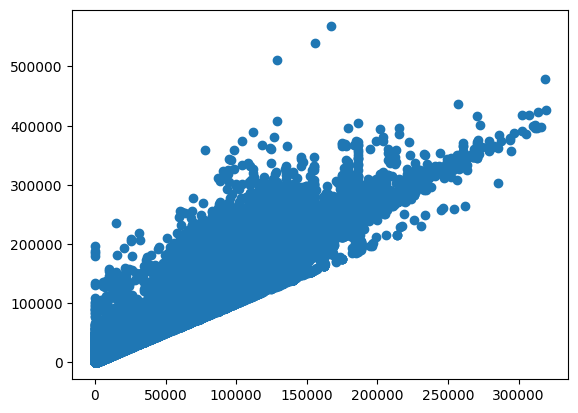

In [775]:
plt.scatter(x= df['BasePay'], y= df['TotalPayBenefits'])

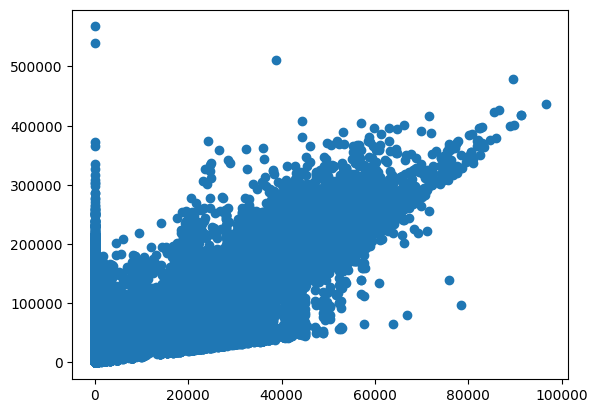

In [776]:
plt.scatter(x= df['Benefits'], y= df['TotalPayBenefits'])

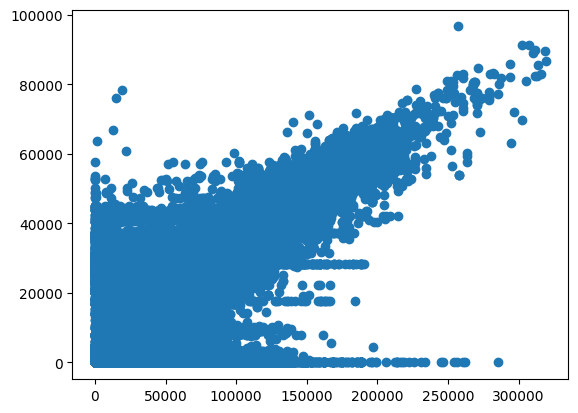

In [777]:
plt.scatter(x= df['BasePay'], y= df['Benefits'])

Text(0, 0.5, 'OvertimePay')

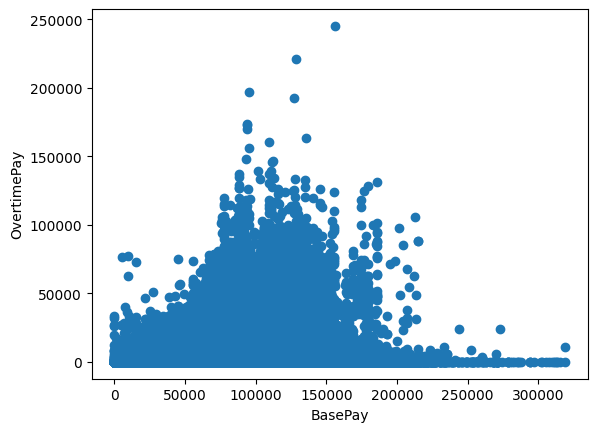

In [781]:
plt.scatter(x= df['BasePay'], y= df['OvertimePay'])
plt.xlabel("BasePay")
plt.ylabel("OvertimePay")

Text(0, 0.5, 'OvertimePay')

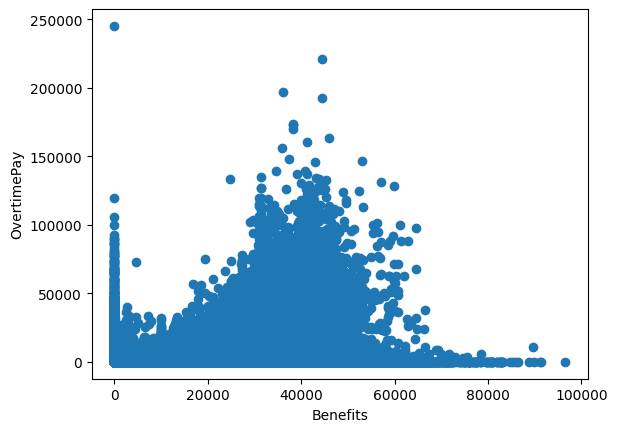

In [784]:
plt.scatter(x= df['Benefits'], y= df['OvertimePay'])
plt.xlabel("Benefits")
plt.ylabel("OvertimePay")

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

1) The salary is strongly correlated to the base pay, with the 2nd major factor affecting the salary is th benefits.  
2) Benefits are strongly correlated to the base pay.  
3) Jobs with low base salary/benefits tend to have low overtime pay, but as salary/benfits grow (mostly reflecting career advancement), overtime pay start to increase, however after considerable increase in salary/benefits, overtime pay start to decrease (as a consequence to having a high position).  
4) from year 2011 to 2014:  
$\;\;\;\;\;\;$ a) Both Base pay & Other pay increased from 2011 to 2013 then fell in 2014.  
$\;\;\;\;\;\;$ b) Overtime pay is the only that kept its rise until 2014.  
$\;\;\;\;\;\;$ c) Benefits largely fluctuated with no clear direction or change.  
5) The 5 most needed Jobs are:  
$\;\;\;\;\;\;$ 1) TRANSIT OPERATOR (9424 jobs)  
$\;\;\;\;\;\;$ 2) SPECIAL NURSE (5790 jobs)  
$\;\;\;\;\;\;$ 3) REGISTERED NURSE (4955 jobs)  
$\;\;\;\;\;\;$ 4) CUSTODIAN (3214 jobs)  
$\;\;\;\;\;\;$ 5) POLICE OFFICER III(3197 jobs)  